In [1]:
%pylab inline
from state.map import X_MAX, Y_MAX, ARENA_WALLS 
from math import sqrt
from math import pi
import state.particle_filtering
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate empty space with right dimensions

def gen_lines():
    lines = []
    for wall in ARENA_WALLS:
        start = wall[0]
        delta = wall[1]

        end = np.add(start, delta)

        line_xs = []
        line_ys = []

        line_xs.append(start[0])
        line_xs.append(end[0])
        line_ys.append(start[1])
        line_ys.append(end[1])

        lines.append(Line2D(line_xs, line_ys, linewidth=2))
        
    return lines 

def plot(particles, robot):
    dpi = 80
    width = X_MAX / dpi;
    height = Y_MAX / dpi;
    figure = plt.figure(figsize=(width,height))

    ax = figure.add_subplot(1,1,1)

    ax.set_ylim(top=Y_MAX, bottom=0)
    ax.set_xlim(right=X_MAX, left=0)

    lines = gen_lines()
    for line in lines:
        ax.add_line(line)

    transpose_locations = particles.locations.T
    transpose_orientations = particles.orientations.T
    
    ax.quiver(transpose_locations[0], transpose_locations[1], np.sin(transpose_orientations), np.cos(transpose_orientations), pivot='mid')
    
    x, y, o = particles.get_position_by_weight(position_confidence=False)
    ax.quiver(x, y, np.sin(o), np.cos(o), color='r', pivot='mid')
    ax.quiver(robot.location[0], robot.location[1], 
              np.sin(robot.orientation), np.cos(robot.orientation), 
              color='b', pivot='mid')

    return figure

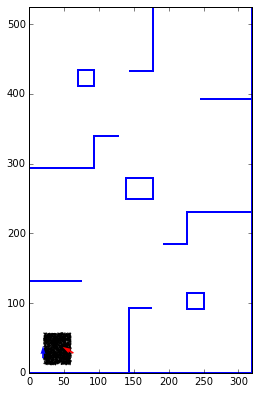

In [417]:
figure = plot(particles, robot)
plt.show(figure)

In [534]:
reload(state.particle_filtering)
particles = state.particle_filtering.Particles(n=1000, where='1base')
robot = state.particle_filtering.Robot(30, 40, 0)

In [535]:
particles.resample()

999.995063083


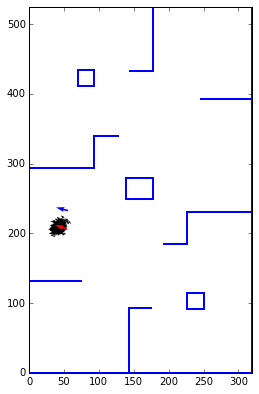

498.441450034


In [563]:
for i in xrange(1):
    factor = -10
    robot.rotate(pi/factor)
    particles.rotate(pi/factor)
    particles.sense(robot.measurement_prediction())
    distance = 10.0
    robot.forward(distance)
    particles.forward(distance)
    particles.sense(robot.measurement_prediction())
    figure = plot(particles, robot)
    plt.show(figure)
    particles.resample()

In [213]:
robot.measurement_prediction()

{'IR_front': 48, 'IR_right': 59}

In [282]:
particles.resample()

In [24]:
robot.measurement_prediction()

[ 20.  41.] [ 27.5  35. ]
[   0.          753.06872196] [  7.53068722e+02   4.61121600e-14]


{'IR_front': 91.0, 'IR_right': 115.5}

In [26]:
robot.rotate(1)

[x=20.00000 y=20.00000 orient=0.77917]

In [21]:
reload(state.particle_filtering)

<module 'state.particle_filtering' from 'state/particle_filtering.py'>

In [249]:
particles.resample()

In [61]:
orientations = np.zeros(10)
ROTATION_STD_ABS = (5.0/360.0)*2*pi
rotation = 1

In [91]:
%timeit (orientations + (np.random.rand(10) * ROTATION_STD_ABS - 0.5 * ROTATION_STD_ABS + rotation)) % (2.0 * pi)

The slowest run took 6.95 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 11.4 µs per loop


In [102]:
%timeit np.mod(np.add(orientations,np.add(np.multiply(np.random.rand(10),ROTATION_STD_ABS),-0.5*ROTATION_STD_ABS + rotation)), 2.0 * pi)

The slowest run took 5.72 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.92 µs per loop


In [103]:
np.array([
            [ np.cos(orientations), np.sin(orientations)],
            [-np.sin(orientations), np.cos(orientations)]
        ])

array([[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]])

In [105]:
N = 10

In [125]:
unit = np.concatenate([np.zeros((N,1)), np.ones((N,1))], axis=1)

In [194]:
FORWARD_STD_FRAC = 0.01

In [195]:
np.add(
    np.multiply(
        np.random.rand(N),
        FORWARD_STD_FRAC*distance
    ),
    (1-0.5*FORWARD_STD_FRAC)*distance
)

array([  9.9911604 ,   9.98131862,  10.03174052,  10.01504872,
         9.96367972,   9.95076157,  10.01823358,   9.95013884,
        10.01128222,  10.02836695])

In [165]:
reload(state.particle_filtering)

<module 'state.particle_filtering' from 'state/particle_filtering.py'>

In [36]:
a = state.particle_filtering.Particles.generate_raycasting_distances()

0
1
2
3
4


KeyboardInterrupt: 

In [71]:
data_10_20 = np.load('data_10_20.dat.npy')
data_20_30 = np.load('data_20_30.dat.npy')
data_30_40 = np.load('data_30_40.dat.npy')
raycasting_distances = np.concatenate([data_00_10[0:10],data_10_20[10:20],data_20_30[20:30],data_30_40[30:40]])
np.save("raycasting_distances", raycasting_distances)

In [596]:
data = []
for i in xrange(8):
    data.append(np.load('bin2/data_' + str(i*20) + '_' + str((i+1)*20) + '.dat.npy')[i*20:(i+1)*20])
raycasting_distances_bin2 = np.concatenate(data)
raycasting_distances_bin2

6

In [597]:
np.save("raycasting_distances_bin2", raycasting_distances_bin2)

In [582]:
raycasting_distances[3][3][126]

array([ 7, 21], dtype=uint8)

In [197]:
reload(state.particle_filtering)

<module 'state.particle_filtering' from 'state/particle_filtering.py'>

In [198]:
n=100000
distance = 60
measurements = state.particle_filtering.Particles.model_beam(distance, n)
predictions = np.multiply(np.ones(n), distance)

In [201]:
state.particle_filtering.Particles.learn_intrinsic_parameters(measurements, predictions)

[4.439527735517677,
 0.8762299166005523,
 0.1627523918439058,
 0.0,
 4.6106386306947851,
 0.019109244139915656]

In [202]:
np.std(measurements)

4.9914872322996144

In [36]:
np.average(np.multiply(np.arange(5),np.concatenate([np.zeros((5,1)), np.ones((5,1))], axis=1).T), axis = 1)

array([ 0.,  2.])

In [41]:
np.average(np.multiply(np.arange(5),np.zeros((5,1))))

0.0

In [7]:
import datetime

In [11]:
'{}, {}, {}'.format('1', 1.1, 5)

'1, 1.1, 5'